# About Dataset
Here we have 5 companies, namely A, B, C, D and E these are pizza making restaurants basically located in Canada that aims to increase their profit margin by selling vegan as well as non-vegan pizza of specific size with a variety of toppings that appeal to everyone’s taste

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [2]:
df = pd.read_csv('/kaggle/input/canada-pizza-price-prediction/pizza_v2.csv')
df.head()

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,$29,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,$25,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,$19,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,$22,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,$30,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [3]:
df.shape

(129, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_cad        129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df['price_cad'] = df['price_cad'].apply(lambda x:str(x).strip().replace('$','')).astype(float)
df['diameter'] = df['diameter'].str.replace(' inch','').str.replace(' \n','').astype(float)

# Price Distribution

<AxesSubplot:xlabel='price_cad', ylabel='Density'>

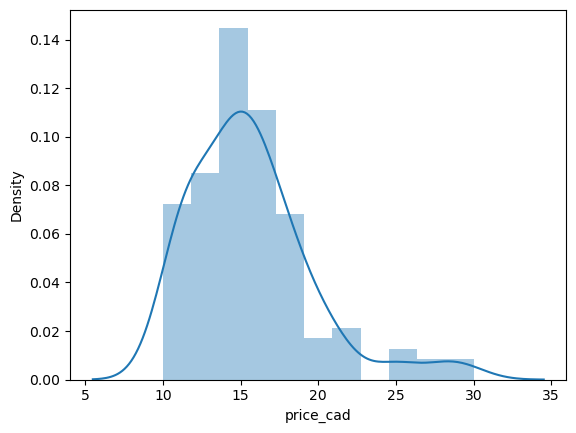

In [6]:
sns.distplot(df['price_cad'])

In [7]:
df.loc[:,df.dtypes=='object'] = df.select_dtypes(include=['object']).apply(lambda x:x.astype('category'))

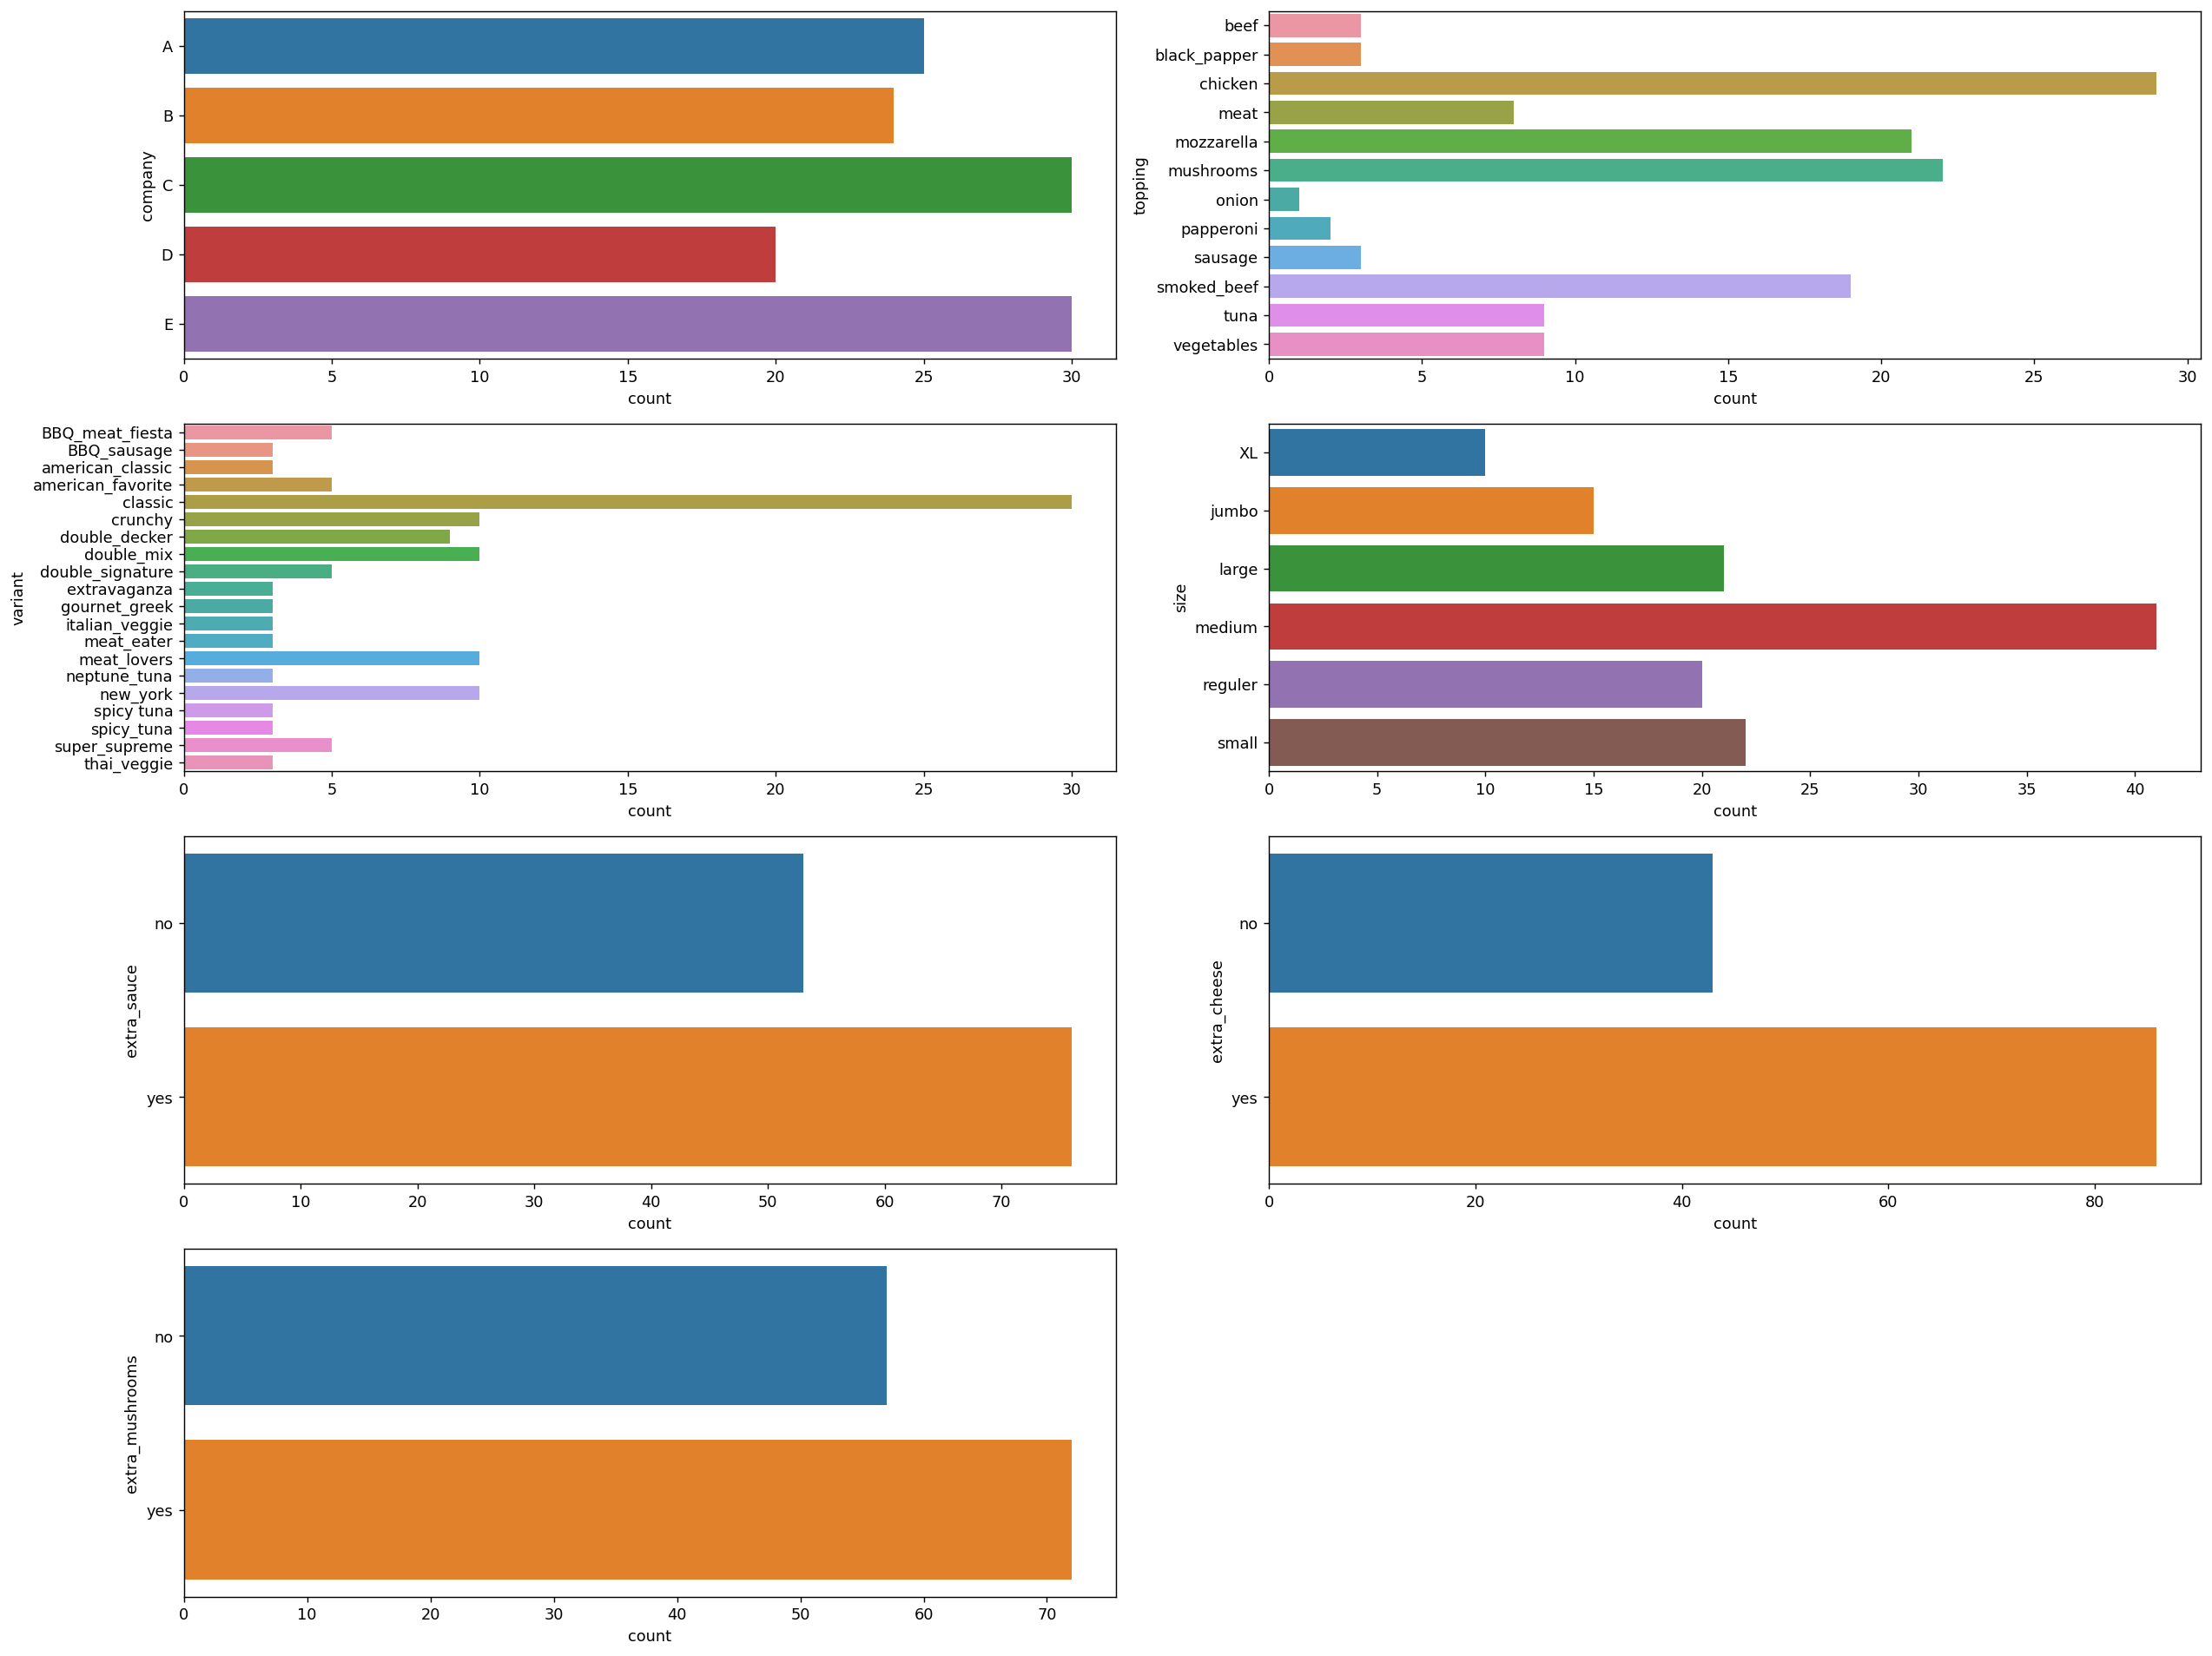

In [8]:
columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']

fig,ax = plt.subplots(dpi=128,figsize=(20,15))
for num,i in enumerate(columns,1):
    plt.subplot(4,2,num)
    sns.countplot(y=df[i],data=df)
plt.tight_layout()
plt.show()

# Bivariate Analysis

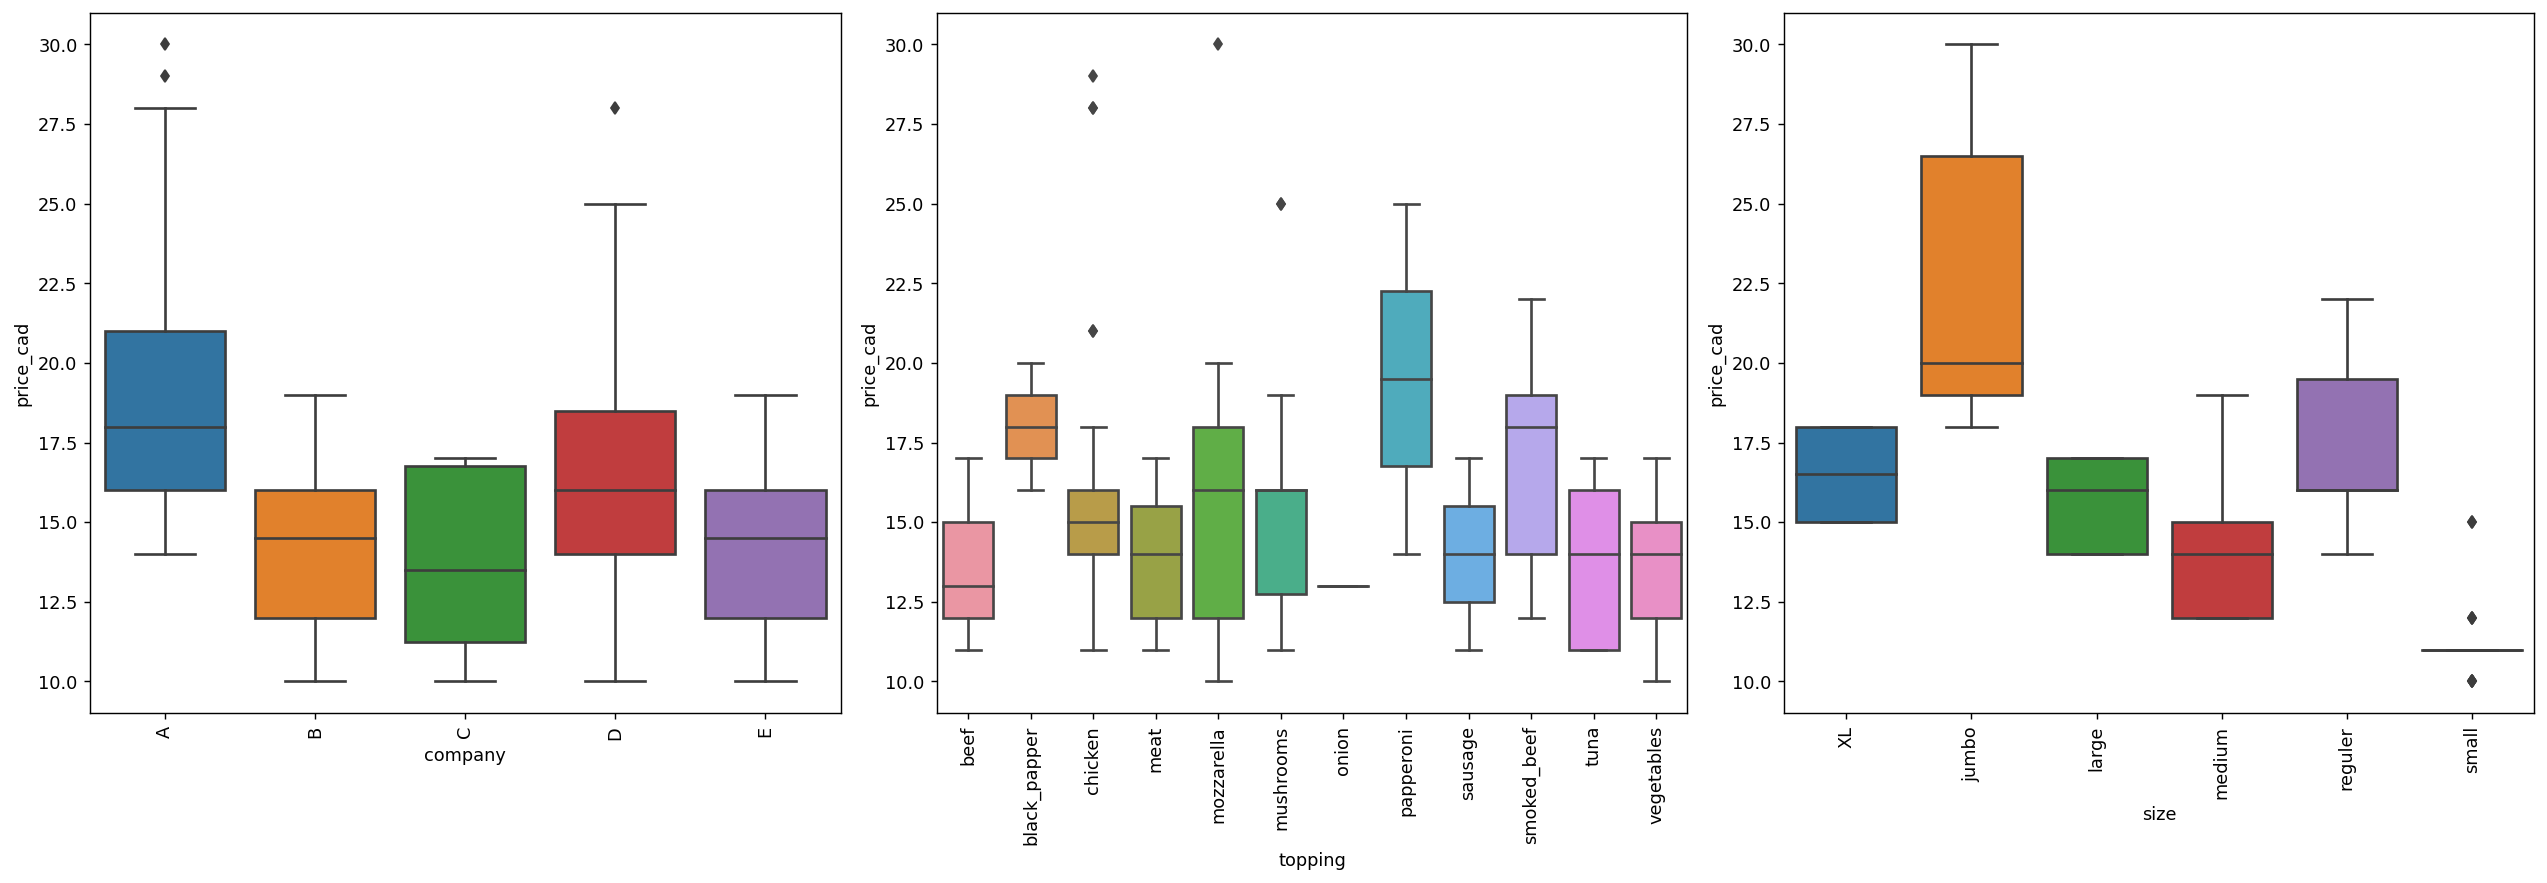

In [9]:
# price by company,topping,size
col = ['company','topping','size']

fig,ax = plt.subplots(dpi=128,figsize=(20,7))
for num,i in enumerate(col,1):
    plt.subplot(1,3,num)
    sns.boxplot(x=i,y='price_cad',data=df)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# the most expensive pizza
df[df['price_cad'] == df['price_cad'].max()]

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,30.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Data Preprocessing

In [11]:
columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
df1 = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True) for i in columns],axis=1)
df1.drop(columns,axis=1,inplace=True)
df1.head(3)

,price_cad,diameter,B,C,D,E,black_papper,chicken,meat,mozzarella,mushrooms,onion,papperoni,sausage,smoked_beef,tuna,vegetables,BBQ_sausage,american_classic,american_favorite,classic,crunchy,double_decker,double_mix,double_signature,extravaganza,gournet_greek,italian_veggie,meat_eater,meat_lovers,neptune_tuna,new_york,spicy tuna,spicy_tuna,super_supreme,thai_veggie,jumbo,large,medium,reguler,small,yes,yes,yes
0,29.0,22.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,25.0,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,19.0,16.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [12]:
X = df1.drop('price_cad',axis=1)
y = df1['price_cad']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['diameter']])
input_scaled = scaler.transform(X[['diameter']])
scaled_data = pd.DataFrame(input_scaled, columns=['diameter'])

In [14]:
X_scaled =scaled_data.join(X.drop(['diameter'],axis=1))

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((103, 43), (103,), (26, 43), (26,))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [17]:
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor(max_depth = 4)
rf = RandomForestRegressor(max_depth = 6, n_estimators = 90, random_state = 73)
etree= ExtraTreesRegressor()
gb = GradientBoostingRegressor(max_depth = 3, n_estimators = 50, random_state = 37)
knn = KNeighborsRegressor(n_neighbors= 9)

Models = [lr,tree,etree,rf,gb,knn]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.9054204006312987
Predictions are : [12.81071259 12.89916535 15.10806335 11.51590121 15.60626474 14.9728686
 14.76885338 16.79227895 12.62263517 12.73454586 11.02598931 16.01663435
 12.83192003 23.93505634 15.01778788 10.95557429 17.82351569 19.64266522
 16.22584489 26.05795092 15.83314304 21.46059497 13.52208338 20.28034812
 12.33192003 14.98010894]
R2 score is : 0.8592245935978279
MAE : 1.3707724759059774
MSE : 3.099557912559067
RMSE : 1.7605561372927212
           Model Name  R2 score       MAE       MSE      RMSE
0  LinearRegression()  0.859225  1.370772  3.099558  1.760556
Model is: DecisionTreeRegressor(max_depth=4)
Training score : 0.9405775547561644
Predictions are : [10.92857143 13.32142857 15.33333333 10.92857143 14.66666667 13.32142857
 16.9047619  16.         15.33333333 13.32142857 10.92857143 14.66666667
 10.92857143 25.         14.66666667 10.92857143 19.         16.9047619
 16.9047619  28.5        15.33333333 20.         13

In [18]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','ExtraTreesRegressor','GradientBoostingRegressor','KNeighborsRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
4,GradientBoostingRegressor,0.932961,0.662190,1.476047,1.214927
1,DecisionTreeRegressor,0.913559,0.953297,1.903236,1.379578
2,RandomForestRegressor,0.889884,0.563462,2.424496,1.557079
3,ExtraTreesRegressor,0.885605,0.896168,2.518729,1.587050
0,LinearRegression,0.859225,1.370772,3.099558,1.760556
5,KNeighborsRegressor,0.792083,1.594017,4.577873,2.139596


In [19]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
res = df1.merge(out,left_index=True,right_index=True)
res.head(10)

,price_cad,diameter,B,C,D,E,black_papper,chicken,meat,mozzarella,mushrooms,onion,papperoni,sausage,smoked_beef,tuna,vegetables,BBQ_sausage,american_classic,american_favorite,classic,crunchy,double_decker,double_mix,double_signature,extravaganza,gournet_greek,italian_veggie,meat_eater,meat_lovers,neptune_tuna,new_york,spicy tuna,spicy_tuna,super_supreme,thai_veggie,jumbo,large,medium,reguler,small,yes,yes,yes,Price_actual,Price_pred
4,30.0,18.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,30.0,24.496226
10,20.0,18.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,20.0,20.212275
11,18.0,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,18.0,18.374374
18,16.0,12.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,16.0,15.553092
19,16.0,12.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,16.0,15.744409
26,12.0,12.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,12.0,12.851566
27,14.0,14.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,14.0,14.338930
31,11.0,8.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,11.0,11.311635
36,19.0,12.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,19.0,18.055609
40,15.0,12.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15.0,13.655586
